# 텐서플로우 다중선형회귀 모델링

### Import

In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
print(tf.__version__)

2.10.0


### 컬럼명

In [3]:
columns = ["평균기온", "최고온도", "최저온도", "기온고저", "평균습도", "강수량"]

In [4]:
# 경로 설정
products = os.listdir("../DataRefine/거래물량 데이터/정제된 파일")
read_path = "../DataRefine/거래물량 데이터/정제된 파일"

In [5]:
df = pd.read_csv(f"{read_path}/{products[0]}")
df

,평균기온,최고온도,최저온도,기온고저,평균습도,강수량,거래물량
0,-9.20,-3.03,-15.40,12.37,62.83,1.33,2.43000
1,-9.90,-2.80,-17.00,14.20,58.50,1.38,1.27500
2,-9.68,-2.14,-17.22,15.08,57.20,1.40,1.39000
3,-8.93,-1.33,-16.55,15.22,56.33,1.42,1.39000
4,-8.53,-0.81,-16.26,15.44,54.86,1.43,1.54875
...,...,...,...,...,...,...,...
3089,1.00,9.10,-5.59,14.70,66.56,14.78,4.80542
3090,0.86,8.94,-5.65,14.59,67.05,13.91,4.85012
3091,0.85,8.81,-5.62,14.42,67.16,13.04,4.82448
3092,0.73,8.41,-5.53,13.94,66.61,12.16,4.97581


### 데이터 분리

In [6]:
df_x_data = df.drop(['거래물량'], axis=1)
df_y_data = df['거래물량']

df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(df_x_data, df_y_data, test_size=0.3, random_state=20221004)
# df_train, df_test = train_test_split(df, test_size=0.3, random_state=20221004, stratify=df['거래물량'])

### 분리된 데이터 출력

In [7]:
print("X 훈련데이터")
print(len(df_x_train), np.mean(df_x_train), sep='\n')
print("Y 훈련데이터")
print(len(df_y_train), np.mean(df_y_train), sep='\n')
print()
print("X 테스트데이터")
print(len(df_x_test), np.mean(df_x_test), sep='\n')
print("Y 테스트데이터")
print(len(df_y_test), np.mean(df_y_test), sep='\n')

X 훈련데이터
2165
평균기온    12.830092
최고온도    19.629774
최저온도     6.531977
기온고저    13.097806
평균습도    66.978000
강수량     54.873150
dtype: float64
Y 훈련데이터
2165
57.05457213394919

X 테스트데이터
929
평균기온    12.555727
최고온도    19.361184
최저온도     6.290172
기온고저    13.071227
평균습도    67.127675
강수량     54.063552
dtype: float64
Y 테스트데이터
929
53.97259765339068


C:\Users\JungHoimin\anaconda3\envs\WWTFFF\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [8]:
import matplotlib.pyplot as plt

In [9]:
len(df_x_train)

2165

<AxesSubplot:>

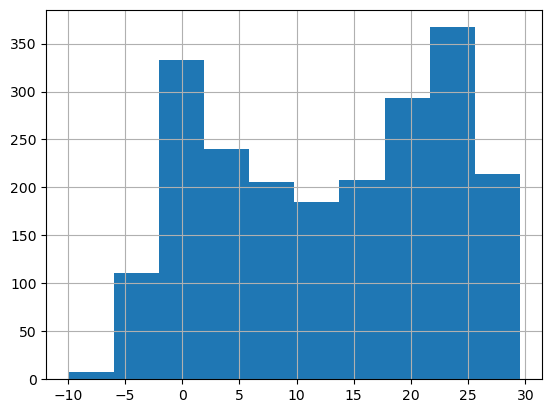

In [10]:
df_x_train['평균기온'].hist()

<AxesSubplot:>

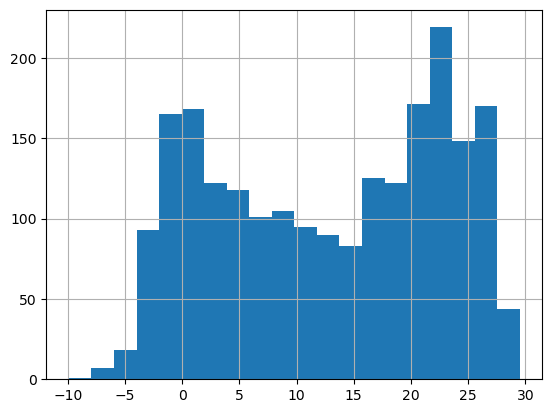

In [11]:
df_x_train['평균기온'].hist(bins=20)

### 데이터 삽입

In [12]:
train_stats = df_x_train.describe()
train_stats = train_stats.transpose()

In [13]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(df_x_train)
normed_test_data = norm(df_x_test)

In [14]:
def build_model():
    model = tf.keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(df_x_train.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    return model

In [15]:
model = build_model()

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________


In [17]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

1/1 [==============================] - 0s 149ms/step


array([[-0.05811186],
       [ 0.16144875],
       [ 0.65018964],
       [ 0.4514169 ],
       [-0.15003514],
       [-0.0771072 ],
       [ 0.5053023 ],
       [ 0.06939423],
       [-0.0296039 ],
       [ 0.48379034]], dtype=float32)

In [18]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0:
            print('')
        print('.', end='')

EPOCHS = 10000

history = model.fit(
    normed_train_data, df_y_train,
    epochs=EPOCHS, validation_split = 0.2, verbose=0,
    callbacks=[PrintDot()]
)


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
...........................................................................................

In [19]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
9995,161.247589,7.296282,161.247589,420.974884,11.882678,420.974884,9995
9996,163.492020,7.237617,163.492020,454.099915,13.020432,454.099915,9996
9997,163.328796,7.223493,163.328796,525.173340,14.551432,525.173340,9997
9998,149.017090,7.236773,149.017090,463.425446,12.517331,463.425446,9998
9999,167.261856,7.478855,167.261856,404.620880,11.195875,404.620880,9999


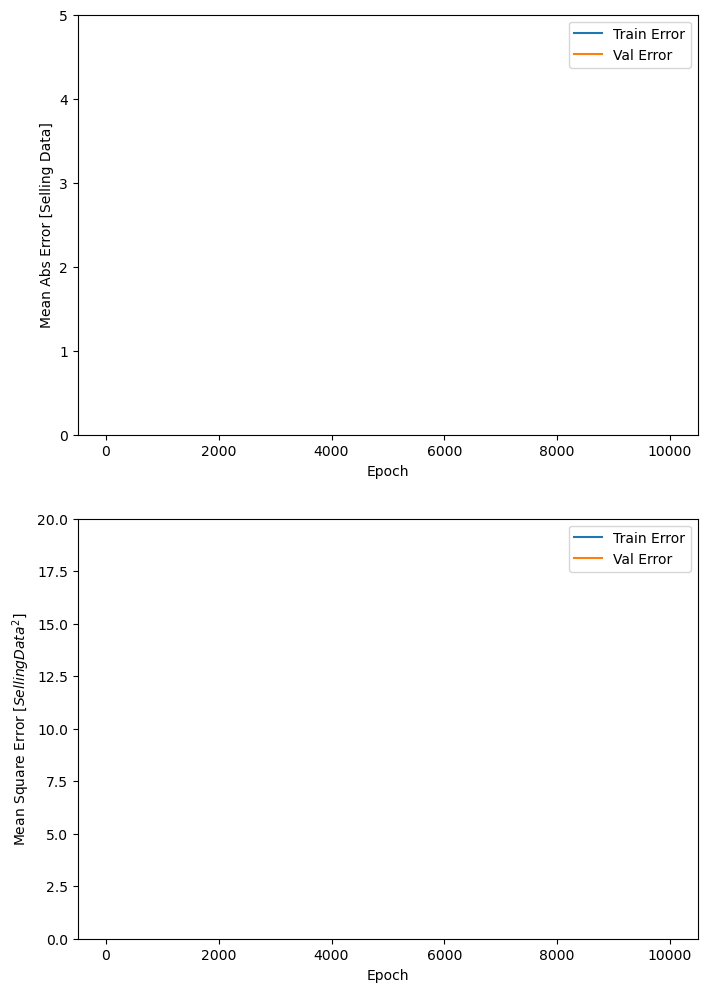

In [20]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(8,12))

    plt.subplot(2,1,1)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [Selling Data]')
    plt.plot(hist['epoch'], hist['mae'],
             label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
             label = 'Val Error')
    plt.ylim([0,5])
    plt.legend()

    plt.subplot(2,1,2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$Selling Data^2$]')
    plt.plot(hist['epoch'], hist['mse'],
             label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
             label = 'Val Error')
    plt.ylim([0,20])
    plt.legend()
    plt.show()

plot_history(history)

In [21]:
loss, mae, mse = model.evaluate(normed_test_data, df_y_test , verbose=2)

print("테스트 세트의 평균 절대 오차: {:5.2f} 거래물량".format(mae))

30/30 - 0s - loss: 256.4920 - mae: 8.7714 - mse: 256.4920 - 43ms/epoch - 1ms/step
테스트 세트의 평균 절대 오차:  8.77 거래물량


30/30 [==============================] - 0s 846us/step


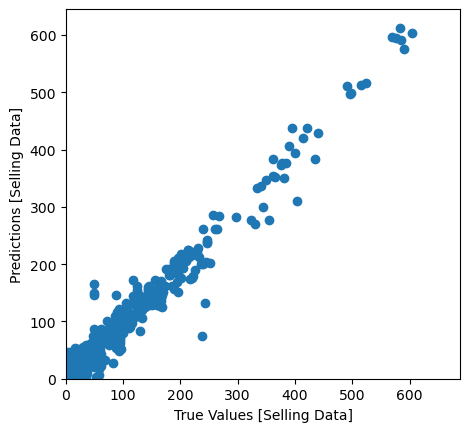

In [22]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(df_y_test, test_predictions)
plt.xlabel('True Values [Selling Data]')
plt.ylabel('Predictions [Selling Data]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

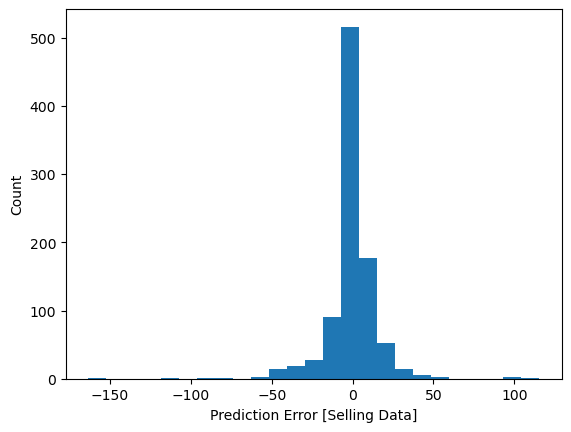

In [23]:
error = test_predictions - df_y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Selling Data]")
_ = plt.ylabel("Count")

### Save Model

In [24]:
model.save('./saved_model/my_model')

INFO:tensorflow:Assets written to: ./saved_model/my_model\assets


### 모델 불러오기

In [25]:
new_model = tf.keras.models.load_model("saved_model/my_model")

In [26]:
loss, mae, mse = new_model.evaluate(normed_test_data, df_y_test , verbose=2)

print("테스트 세트의 평균 절대 오차: {:5.2f} 거래물량".format(mae))

30/30 - 0s - loss: 256.4920 - mae: 8.7714 - mse: 256.4920 - 122ms/epoch - 4ms/step
테스트 세트의 평균 절대 오차:  8.77 거래물량
